# Save images from DOOCS to disk

### Imports

In [2]:
import pydoocs
import numpy as np
import time   # when DOOCS server no macropulse number other than 0
import matplotlib.pyplot as plt

### Parameters

In [13]:
image_doocs_address = 'FLASH.FEL/FBL1.CAM/FOCUS_MICROSCOPE/IMAGE_EXT_ZMQ'
train_ID = 0


### Utility functions

In [16]:
def wait_for_next_train(image_doocs_address):
    global train_ID
    while True:
        current_ID = pydoocs.read(image_doocs_address)['macropulse']
        if train_ID != current_ID:
            train_ID = current_ID
            break
            
def image_waiting(image_doocs_address):
    wait_for_next_train(image_doocs_address)
    image_dictonary = pydoocs.read(image_doocs_address)
    image = image_dictonary['data']
    return image

def record_image(image_doocs_address):
    image = image_waiting(image_doocs_address)
    np.savez('data/image_' + str(train_ID) + '.npz', image = image)


### Save images to disk

In [23]:
number_of_images_to_record = 100

for i in range(number_of_images_to_record):
    record_image(image_doocs_address)

### Show last saved image

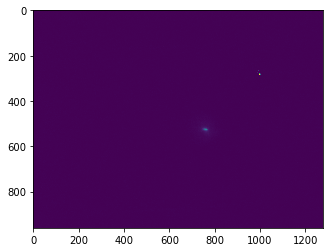

In [24]:
npz_file = np.load('data/image_' + str(train_ID) + '.npz')
image_from_file = npz_file['image']
plt.imshow(image_from_file)